# Module 10 Application

## Challenge: Crypto Clustering

In this Challenge, you’ll combine your financial Python programming skills with the new unsupervised learning skills that you acquired in this module.

The CSV file provided for this challenge contains price change data of cryptocurrencies in different periods.

The steps for this challenge are broken out into the following sections:

* Import the Data (provided in the starter code)
* Prepare the Data (provided in the starter code)
* Find the Best Value for `k` Using the Original Data
* Cluster Cryptocurrencies with K-means Using the Original Data
* Optimize Clusters with Principal Component Analysis
* Find the Best Value for `k` Using the PCA Data
* Cluster the Cryptocurrencies with K-means Using the PCA Data
* Visualize and Compare the Results

### Import the Data

This section imports the data into a new DataFrame. It follows these steps:

1. Read  the “crypto_market_data.csv” file from the Resources folder into a DataFrame, and use `index_col="coin_id"` to set the cryptocurrency name as the index. Review the DataFrame.

2. Generate the summary statistics, and use HvPlot to visualize your data to observe what your DataFrame contains.


> **Rewind:** The [Pandas`describe()`function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) generates summary statistics for a DataFrame. 

In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    Path("Resources/crypto_market_data.csv"),
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

This section prepares the data before running the K-Means algorithm. It follows these steps:

1. Use the `StandardScaler` module from scikit-learn to normalize the CSV file data. This will require you to utilize the `fit_transform` function.

2. Create a DataFrame that contains the scaled data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.


In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data

In this section, you will use the elbow method to find the best value for `k`.

1. Code the elbow method algorithm to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following question: What is the best value for `k`?

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

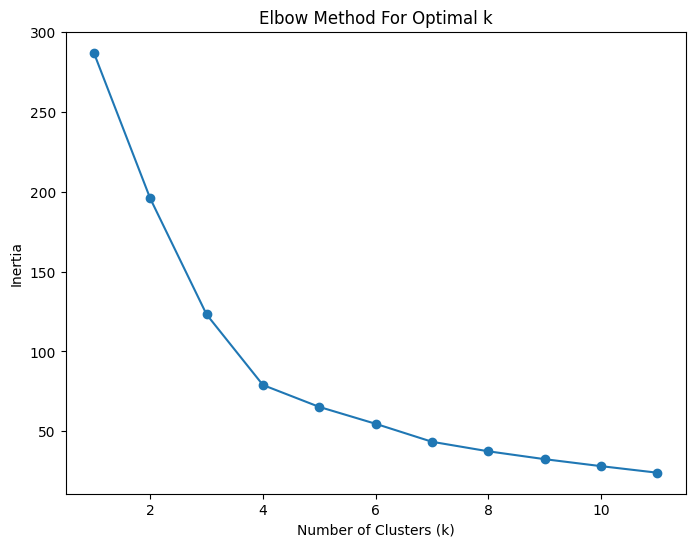

In [7]:

# Load your data
df_market_data = pd.read_csv('/Users/neilbaride/Downloads/Starter_Code/Resources/crypto_market_data.csv')

# Assuming 'Name' is a non-numeric column that should be excluded
numeric_data = df_market_data.select_dtypes(include='number')

# Standardize the data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(numeric_data)

# Create an empty dictionary to store inertia values
inertia_dict = {'k_values': [], 'inertia_values': []}

# Range of k values (1 to 11)
k_values = range(1, 12)

# Iterate over each k
for k in k_values:
    # Create a KMeans model with the current k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(df_market_data_scaled)
    
    # Append the values to the dictionary
    inertia_dict['k_values'].append(k)
    inertia_dict['inertia_values'].append(kmeans.inertia_)

# Create a DataFrame from the dictionary
df_inertia = pd.DataFrame(inertia_dict)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(df_inertia['k_values'], df_inertia['inertia_values'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?

**Answer:** Looking at the data K is best at 4 as it the elbow point of the graph. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In this section, you will use the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the original data.

3. Predict the clusters to group the cryptocurrencies using the original data. View the resulting array of cluster values.

4. Create a copy of the original data and add a new column with the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [8]:


# Load your data 
df_market_data = pd.read_csv('/Users/neilbaride/Downloads/Starter_Code/Resources/crypto_market_data.csv')

# line to exclude other non-numeric columns
numeric_data = df_market_data.select_dtypes(include='number')

# Standardize the data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(numeric_data)

# Initialize the KMeans model with the best value for k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to the original data
kmeans.fit(numeric_data)

# Predict the clusters
clusters = kmeans.predict(numeric_data)

# Create a copy of the original data
df_market_data_clusters = df_market_data.copy()

# Add a new column with the predicted clusters
df_market_data_clusters['cluster'] = clusters

# Create a scatter plot using hvPlot
scatter_plot = df_market_data_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",  # Color points by cluster
    hover_cols=["Name"],  # Show crypto name on hover
    title='Crypto Clusters',
    width=800,
    height=600
)

# Show the plot
scatter_plot


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis

In this section, you will perform a principal component analysis (PCA) and reduce the features to three principal components.

1. Create a PCA model instance and set `n_components=3`.

2. Use the PCA model to reduce to three principal components. View the first five rows of the DataFrame. 

3. Retrieve the explained variance to determine how much information can be attributed to each principal component.

4. Answer the following question: What is the total explained variance of the three principal components?

5. Create a new DataFrame with the PCA data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.

In [9]:

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)

# Use the PCA model to reduce to three principal components
pca_data = pca.fit_transform(numeric_data)

# View the first five rows of the DataFrame
print(pd.DataFrame(pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']).head())

# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance of the three principal components
total_explained_variance = sum(explained_variance)

# Print the total explained variance
print(f'Total Explained Variance of the Three Principal Components: {total_explained_variance:.2%}')

# Create a new DataFrame with the PCA data and set 'coin_id' as the index
df_pca = pd.DataFrame(pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'], index=numeric_data.index)

# Review the resulting DataFrame
print(df_pca.head())


   Principal Component 1  Principal Component 2  Principal Component 3
0            -341.800963             -51.366775              12.525471
1            -249.420466              24.117548             -14.231466
2            -402.614721            -118.710737              24.838397
3            -406.752437             -79.487286               1.566331
4            -382.429948            -103.431959              16.753073
Total Explained Variance of the Three Principal Components: 99.98%
   Principal Component 1  Principal Component 2  Principal Component 3
0            -341.800963             -51.366775              12.525471
1            -249.420466              24.117548             -14.231466
2            -402.614721            -118.710737              24.838397
3            -406.752437             -79.487286               1.566331
4            -382.429948            -103.431959              16.753073


#### Answer the following question: What is the total explained variance of the three principal components?

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance of the Three Principal Components: 99.98%

In [10]:
# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data['coin_id']

# Set the 'coin_id' column as the index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
print(df_pca.head())


              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                 -341.800963             -51.366775   
ethereum                -249.420466              24.117548   
tether                  -402.614721            -118.710737   
ripple                  -406.752437             -79.487286   
bitcoin-cash            -382.429948            -103.431959   

              Principal Component 3  
coin_id                              
bitcoin                   12.525471  
ethereum                 -14.231466  
tether                    24.838397  
ripple                     1.566331  
bitcoin-cash              16.753073  


---

### Find the Best Value for k Using the PCA Data

In this section, you will use the elbow method to find the best value for `k` using the PCA data.

1. Code the elbow method algorithm and use the PCA data to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

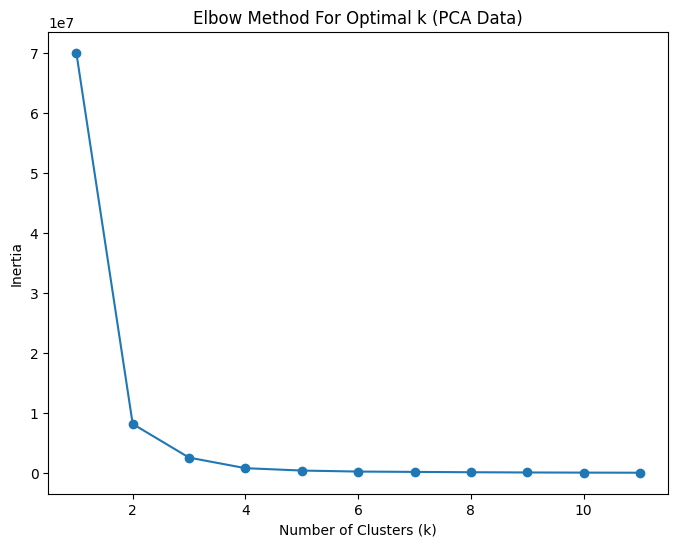

In [11]:
# Create a dictionary to store inertia values for different k values
pca_inertia_dict = {'k_values': [], 'inertia_values': []}

# Range of k values (1 to 11)
k_values = range(1, 12)

# Iterate over each k
for k in k_values:
    # Create a KMeans model with the current k
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA data
    kmeans_pca.fit(df_pca)
    
    # Append the values to the dictionary
    pca_inertia_dict['k_values'].append(k)
    pca_inertia_dict['inertia_values'].append(kmeans_pca.inertia_)

# Create a DataFrame from the dictionary
df_pca_inertia = pd.DataFrame(pca_inertia_dict)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(df_pca_inertia['k_values'], df_pca_inertia['inertia_values'], marker='o')
plt.title('Elbow Method For Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The K - value dropped at 3.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** # The dimmention change making it more clusterd than orignal eblow graph. 

---

### Cluster Cryptocurrencies with K-means Using the PCA Data

In this section, you will use the PCA data and the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the principal components.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the PCA data.

3. Predict the clusters to group the cryptocurrencies using the PCA data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the PCA data to store the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [12]:
# Find the optimal k for PCA (you can visually identify it from the plot)
optimal_k_pca = 4  

# Initialize the KMeans model with the optimal k for PCA
kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42)

# Fit the model to the PCA data
kmeans_pca.fit(df_pca.iloc[:, :-1])  

# Predict the clusters
clusters_pca = kmeans_pca.predict(df_pca.iloc[:, :-1])

# Add a new column to the DataFrame with the PCA data to store the predicted clusters
df_pca['Cluster'] = clusters_pca

# Create a scatter plot using hvPlot
scatter_plot_pca = df_pca.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    by='Cluster',
    hover_cols=['Name'],  
    title='Crypto Clusters (PCA Data)',
    width=800,
    height=600
)

# Print the optimal k for PCA
print(f"Optimal k for PCA: {optimal_k_pca}")

# Show the plot
scatter_plot_pca


Optimal k for PCA: 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


:NdOverlay   [Cluster]
   :Scatter   [Principal Component 1]   (Principal Component 2)

---

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

1. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the Elbow Curve that you created to find the best value for `k` with the original and the PCA data.

2. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the cryptocurrencies clusters using the original and the PCA data.

3. Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

> **Rewind:** Back in Lesson 3 of Module 6, you learned how to create composite plots. You can look at that lesson to review how to make these plots; also, you can check [the hvPlot documentation](https://holoviz.org/tutorial/Composing_Plots.html).

In [15]:

# Code for Elbow Curve Comparison
scatter_plot = df_market_data_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",  # Color points by cluster
    colormap='viridis',  # Choose a colormap
    title='Crypto Clusters',
    width=800,
    height=600
)

# Code for Crypto Clusters Comparison
scatter_original = df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='KMeans Cluster (Original)',  # Color points by original cluster
    colormap='viridis',  # Choose a colormap
    title='Crypto Clusters (Original Data)',
    width=400,
    height=400
)

# Create a scatter plot using hvPlot
scatter_plot_pca = df_pca.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    c='Cluster',
    colormap='viridis',  # Choose a colormap
    title='Crypto Clusters (PCA Data)',
    width=800,
    height=600
)

# Combine the plots
composite_scatter_plot = scatter_original * scatter_plot_pca

# Show the composite plots
composite_elbow_curve + composite_scatter_plot


NameError: name 'df' is not defined

#### Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** # YOUR ANSWER HERE!